In [586]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 25)

# Data manipulation & collecting

## Cleaning data from the first Dataset

In [587]:
df = pd.read_csv("./Billboard Hot 100 since 1958.csv")

In [588]:
df.columns

Index(['chart_position', 'chart_date', 'song', 'performer', 'song_id',
       'instance', 'time_on_chart', 'consecutive_weeks', 'previous_week',
       'peak_position', 'worst_position', 'chart_debut', 'chart_url'],
      dtype='object')

In [589]:
df.isnull().sum()

chart_position           0
chart_date               0
song                     0
performer                0
song_id                  0
instance                 0
time_on_chart            0
consecutive_weeks    33667
previous_week        33667
peak_position            0
worst_position           0
chart_debut              0
chart_url                0
dtype: int64

In [590]:
df.shape

(338395, 13)

In [591]:
df['chart_date'] = pd.to_datetime(df['chart_date'], format='%Y-%m-%d')
df.drop(['chart_position'], axis=1)
df.sort_values(['chart_date', 'chart_position'], ascending=[True, True], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(1000)['chart_date'].value_counts()

chart_date
1958-08-02    100
1958-08-09    100
1958-08-16    100
1958-08-23    100
1958-08-30    100
1958-09-06    100
1958-09-13    100
1958-09-20    100
1958-09-27    100
1958-10-04    100
Name: count, dtype: int64

In [592]:
# Check if every date is the same
df['chart_day'] = df['chart_date'].dt.dayofweek
df['chart_day'] = df['chart_day'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})
df = df[['chart_position', 'chart_date', 'chart_day', 'song', 'performer' 
        #,'song_id' #, 'instance', 'time_on_chart', 
       #'consecutive_weeks', 'previous_week',
       #'peak_position', 'worst_position', 'chart_debut'
       , 'chart_url'
       ]]
df

,chart_position,chart_date,chart_day,song,performer,chart_url
0,1,1958-08-02,Saturday,Poor Little Fool,Ricky Nelson,https://www.billboard.com/charts/hot-100/1958-...
1,2,1958-08-02,Saturday,Patricia,Perez Prado And His Orchestra,https://www.billboard.com/charts/hot-100/1958-...
2,3,1958-08-02,Saturday,Splish Splash,Bobby Darin,https://www.billboard.com/charts/hot-100/1958-...
3,4,1958-08-02,Saturday,Hard Headed Woman,Elvis Presley With The Jordanaires,https://www.billboard.com/charts/hot-100/1958-...
4,5,1958-08-02,Saturday,When,Kalin Twins,https://www.billboard.com/charts/hot-100/1958-...
...,...,...,...,...,...,...
338390,96,2023-05-27,Saturday,Forever,Lil Baby Featuring Fridayy,https://www.billboard.com/charts/hot-100/2023-...
338391,97,2023-05-27,Saturday,Private Landing,Don Toliver Featuring Justin Bieber & Future,https://www.billboard.com/charts/hot-100/2023-...
338392,98,2023-05-27,Saturday,I Heard,YoungBoy Never Broke Again,https://www.billboard.com/charts/hot-100/2023-...
338393,99,2023-05-27,Saturday,Sunrise,Morgan Wallen,https://www.billboard.com/charts/hot-100/2023-...


In [593]:
df['chart_day'].value_counts()

chart_day
Saturday    338395
Name: count, dtype: int64

100 % of the entries are reset on Saturday so I'm going to drop it to clean the DataFrame

In [594]:
df.drop('chart_day', axis=1, inplace=True)

In [595]:
df.head(100).song.value_counts()

song
Got A Match?                2
Early In The Morning        2
Over And Over               2
Poor Little Fool            1
High School Confidential    1
                           ..
Angel Baby                  1
Enchanted Island            1
Secretly                    1
Think It Over               1
Judy                        1
Name: count, Length: 97, dtype: int64

Here are some repetition, so I'm finding a way to understand it.

In [596]:
df.head(100).chart_position.value_counts()

chart_position
63     2
50     2
74     2
73     1
72     1
      ..
31     1
30     1
29     1
28     1
100    1
Name: count, Length: 97, dtype: int64

In [597]:
df.head(100)[df['chart_position'].isin([50, 74, 63])].sort_values(by='chart_position')

/var/folders/qk/t7psjtl510s8pvxmhbfn6v780000gn/T/ipykernel_1419/2881002666.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.head(100)[df['chart_position'].isin([50, 74, 63])].sort_values(by='chart_position')


,chart_position,chart_date,song,performer,chart_url
49,50,1958-08-02,"Baubles, Bangles And Beads",The Kirby Stone Four,https://www.billboard.com/charts/hot-100/1958-...
50,50,1958-08-02,By The Light Of The Silvery Moon,Jimmy Bowen with the Rhythm Orchids,https://www.billboard.com/charts/hot-100/1958-...
62,63,1958-08-02,High School Confidential,Jerry Lee Lewis And His Pumping Piano,https://www.billboard.com/charts/hot-100/1958-...
63,63,1958-08-02,Padre,Toni Arden,https://www.billboard.com/charts/hot-100/1958-...
73,74,1958-08-02,Gotta Have Rain,Eydie Gorme,https://www.billboard.com/charts/hot-100/1958-...
74,74,1958-08-02,Win Your Love For Me,Sam Cooke,https://www.billboard.com/charts/hot-100/1958-...


In [598]:
# Rechecking the db with that on billboard website
df.at[22, 'chart_url']

'https://www.billboard.com/charts/hot-100/1958-08-02'

In [599]:
df[df['chart_date'] == '1958-08-02']

,chart_position,chart_date,song,performer,chart_url
0,1,1958-08-02,Poor Little Fool,Ricky Nelson,https://www.billboard.com/charts/hot-100/1958-...
1,2,1958-08-02,Patricia,Perez Prado And His Orchestra,https://www.billboard.com/charts/hot-100/1958-...
2,3,1958-08-02,Splish Splash,Bobby Darin,https://www.billboard.com/charts/hot-100/1958-...
3,4,1958-08-02,Hard Headed Woman,Elvis Presley With The Jordanaires,https://www.billboard.com/charts/hot-100/1958-...
4,5,1958-08-02,When,Kalin Twins,https://www.billboard.com/charts/hot-100/1958-...
...,...,...,...,...,...
95,96,1958-08-02,Over And Over,Thurston Harris,https://www.billboard.com/charts/hot-100/1958-...
96,97,1958-08-02,I Believe In You,Robert & Johnny,https://www.billboard.com/charts/hot-100/1958-...
97,98,1958-08-02,Little Serenade,The Ames Brothers,https://www.billboard.com/charts/hot-100/1958-...
98,99,1958-08-02,I'll Get By (As Long As I Have You),Billy Williams,https://www.billboard.com/charts/hot-100/1958-...


The df is identical to the website

Turns out, Billboard allows two songs to have the same position on a weekly chart.

![image.png](./images/img1.png)

Now, it's time to fix some weeks that have more/less than 100 entries

In [600]:
df.drop('chart_url', axis=1, inplace=True)
df.chart_date.value_counts().value_counts()

count
100    3377
99        5
200       1
Name: count, dtype: int64

In [601]:
df['chart_date'].value_counts()[df['chart_date'].value_counts() == 99]

chart_date
1991-11-16    99
1991-11-23    99
1991-11-30    99
1991-12-07    99
1991-12-14    99
Name: count, dtype: int64

In [602]:
missing_value_dates = ['1991-11-16', '1991-11-23', '1991-11-30', '1991-12-07', '1991-12-14']
df[df['chart_date'] == '1991-12-14']

,chart_position,chart_date,song,performer
174096,1,1991-12-14,Black Or White,Michael Jackson
174097,2,1991-12-14,It's So Hard To Say Goodbye To Yesterday,Boyz II Men
174098,3,1991-12-14,Set Adrift On Memory Bliss,P.M. Dawn
174099,4,1991-12-14,When A Man Loves A Woman,Michael Bolton
174100,5,1991-12-14,All 4 Love,Color Me Badd
...,...,...,...,...
174190,95,1991-12-14,Groovin',UB40
174191,96,1991-12-14,Lies,EMF
174192,97,1991-12-14,Monsters And Angels,Voice Of The Beehive
174193,99,1991-12-14,Walk Through Fire,Bad Company


In [603]:
# Finding the missing position on the chart by comparing it to a range from 1..100

missing_pos = [i for i in [*range(1,100)] if i not in
            [*df[df['chart_date'] == '1991-11-16']['chart_position'].values]]
# Finding the index of the song that has the position on the chart right before the missing row to insert
previous_missing_pos = missing_pos[0] - 1
df.query("chart_date.isin(@missing_value_dates) & chart_position == @previous_missing_pos")

,chart_position,chart_date,song,performer
173797,98,1991-11-16,Try A Little Tenderness,The Commitments
173895,98,1991-11-23,Groovin',UB40
173994,98,1991-11-30,True Companion,Marc Cohn
174093,98,1991-12-07,My Heart Belongs To You,Russ Irwin


In [604]:
# It seems like the first 4 dates in ['1991-11-16', '1991-11-23', '1991-11-30', '1991-12-07', '1991-12-14'] is missing 
# the entry at the same position except for the '1991-12-14'
missing_pos_last = [i for i in [*range(1,100)] if i not in
            [*df[df['chart_date'] == '1991-12-14']['chart_position'].values]]
previous_missing_pos_last = missing_pos_last[0] - 1
df.query("chart_date == '1991-12-14' & chart_position == @previous_missing_pos_last")

,chart_position,chart_date,song,performer
174192,97,1991-12-14,Monsters And Angels,Voice Of The Beehive


Adding missing values

In [605]:
from datetime import datetime
df.loc[173797.5] = [99,'1991-11-16','Into The Great Wide Open', 'Tom Petty And The Heartbreakers']
df.loc[173895.5] = [99,'1991-11-23','Ain\'t No Future In Yo\' Fronting', 'M.C. Breed & D.F.C.']
df.loc[174093.5] = [99,'1991-11-30','Stand By My Woman', 'Lenny Kravitz']
df.loc[173994.5] = [99,'1991-12-07','Do You Feel Like I Feel?', 'Belinda Carlisle']
df.loc[174192.5] = [98,'1991-12-14','Into The Great Wide Open', 'Tom Petty And The Heartbreakers']
df['chart_date'] = pd.to_datetime(df['chart_date'], format='%Y-%m-%d')
df = df.sort_index().reset_index(drop=True)


In [606]:
# Recheck
df[df['chart_date'] == '1991-11-16']

,chart_position,chart_date,song,performer
173700,1,1991-11-16,Cream,Prince And The N.P.G.
173701,2,1991-11-16,Can't Stop This Thing We Started,Bryan Adams
173702,3,1991-11-16,When A Man Loves A Woman,Michael Bolton
173703,4,1991-11-16,It's So Hard To Say Goodbye To Yesterday,Boyz II Men
173704,5,1991-11-16,Set Adrift On Memory Bliss,P.M. Dawn
...,...,...,...,...
173795,96,1991-11-16,Love Me All Up,Stacy Earl
173796,97,1991-11-16,Love. . .Thy Will Be Done,Martika
173797,98,1991-11-16,Try A Little Tenderness,The Commitments
173798,99,1991-11-16,Into The Great Wide Open,Tom Petty And The Heartbreakers


In [607]:
df['chart_date'].value_counts()[df['chart_date'].value_counts() == 200]

chart_date
2023-01-07    200
Name: count, dtype: int64

In [608]:
df[df['chart_date'] == '2023-01-07']

,chart_position,chart_date,song,performer
336200,1,2023-01-07,All I Want For Christmas Is You,Mariah Carey
336201,1,2023-01-07,All I Want For Christmas Is You,Mariah Carey
336202,2,2023-01-07,Rockin' Around The Christmas Tree,Brenda Lee
336203,2,2023-01-07,Rockin' Around The Christmas Tree,Brenda Lee
336204,3,2023-01-07,Jingle Bell Rock,Bobby Helms
...,...,...,...,...
336395,98,2023-01-07,Forget Me,Lewis Capaldi
336396,99,2023-01-07,La Jumpa,Arcangel & Bad Bunny
336397,99,2023-01-07,La Jumpa,Arcangel & Bad Bunny
336398,100,2023-01-07,Gone Girl,SZA


The week of 2023-01-07 is repeated, that's why there are 200 entries in this week so we'll eliminate the even indices.

In [609]:
for i in range(336200,336399):
    if i % 2 == 0:
        df.drop(i, inplace=True)

In [610]:
df = df.sort_index().reset_index(drop=True)

In [611]:
df

,chart_position,chart_date,song,performer
0,1,1958-08-02,Poor Little Fool,Ricky Nelson
1,2,1958-08-02,Patricia,Perez Prado And His Orchestra
2,3,1958-08-02,Splish Splash,Bobby Darin
3,4,1958-08-02,Hard Headed Woman,Elvis Presley With The Jordanaires
4,5,1958-08-02,When,Kalin Twins
...,...,...,...,...
338295,96,2023-05-27,Forever,Lil Baby Featuring Fridayy
338296,97,2023-05-27,Private Landing,Don Toliver Featuring Justin Bieber & Future
338297,98,2023-05-27,I Heard,YoungBoy Never Broke Again
338298,99,2023-05-27,Sunrise,Morgan Wallen


## add audio features from Spotify API

Todo:
* Find ID of songs and add it to the DF
* Using ID, find audio features of a song
* Add both ID and audio features to the DF

### Finding song ID

Since there are 338300 rows in this DF, finding ID for each row is computationally ineffective since there are a number of duplicates. So the goal here is to just find the unique songs' IDs only.
Assumption: Any song that shares the same name is the same song.

In [612]:
unique_songs = df.song.unique()
len(unique_songs)

25372

Even with unique values, there are *25372* distinct entries that we'll have to find the ID for. Since we are relying on the API to get our information, there will be inherent uncertainties and/or errors (e.g. lost connection, API limit is reached, null result). To ensure the data collecting process will go on smoothly, we'll have to split this array into smaller chunks. If an error occurs or if you want to pause the process, you can terminate it and only have to restart at the last completed chunk.

In [613]:
splitted_unique_songs = np.array_split(unique_songs, 100)
len(splitted_unique_songs[0])

254

There are 254 songs in each array with the exception of the last array. There are 100 arrays in total

### Getting IDs from Spotify API

There is still a scenario in which the song is not on Spotify Search, in this case we'll return NaN instead of pausing the entire process.

In [614]:
import os.path as path
import json
import requests
import spotify_get_cre
import time
if path.isfile('./id_out/99_99.json'):
    print('The process has finished running. Skipped.')
else:

    # Your Spotify API access token
    access_token = spotify_get_cre.get_token()

    # Create a dictionary for song name and id and save it as json to remove the dependency upon the API
    unique_id = {}
    # This is the last position, if you want to resume from a specific point, 
    # change this variable to a specific index from 0..99
    count = 99
    for unique in splitted_unique_songs[count:100]:
        no = 0
        for song in unique:
            
            try:
                # The query parameters for the search
                query_params = {
                    'q': f"{song}",
                    'type': 'track',
                    'limit': 1
                }

                # The Spotify API endpoint for searching
                search_url = 'https://api.spotify.com/v1/search'

                # Define the headers with the access token
                headers = {
                    'Authorization': f'Bearer {access_token}'
                }

                # Make the GET request to the Spotify API
                response = requests.get(search_url, params=query_params, headers=headers)
                result = json.loads(response.content)
                sp_id = result['tracks']['items'][0]['id']
                unique_id[f'{song}'] = sp_id
                print(f'{no} song in {count} added {song}')
                no = no + 1
            except IndexError:
                unique_id[f'{song}'] = 'NaN'
        with open(f"./id_out/{count}_99.json", "w") as outfile:
            json.dump(unique_id, outfile)
        print('Pausing 3 seconds')
        time.sleep(3) # To avoid API bottlenecking
        unique_id = {}
        count = count + 1

The process has finished running. Skipped.


Now, we'll have to merge every ID json files into one

... and it will still only be run once if the file hadn't existed already

In [615]:
if path.isfile('output_id.json'):
    print('The process has finished running. Skipped.')
else:
    import glob
    result = []

    # Define the file paths of the JSON files to merge
    file_paths = glob.glob("./id_out/*.json")
    merged_data = {}

    # Iterate through the file paths
    for file_path in file_paths:
        # Open and read each JSON file
        with open(file_path, 'r') as file:
            data = json.load(file)
        # Merge the data into the merged_data dictionary
        merged_data.update(data)
    # Define the output file path
    output_file = "output_id.json"
    # Write the merged data to the output file
    with open(output_file, 'w') as outfile:
        json.dump(merged_data, outfile, indent=4)

The process has finished running. Skipped.


In [616]:
with open('output_id.json', 'r') as file:
    song_id = json.load(file)
len(song_id)

25372

Add ID column

Save DataFrame to a csv to prevent this algorithm from running everytime

In [617]:
import os.path as path
df['id'] = ''
if path.isfile('billboard_with_id.csv'):
    df = pd.read_csv('billboard_with_id.csv')
else:
    for index, row in df.iterrows():
        df.loc[index, 'id'] = song_id[row['song']]
    df.to_csv('billboard_with_id.csv', index=False)
df

,chart_position,chart_date,song,performer,id
0,1,1958-08-02,Poor Little Fool,Ricky Nelson,5ayybTSXNwcarDtxQKqvWX
1,2,1958-08-02,Patricia,Perez Prado And His Orchestra,6nmr64Mo4RD3R1pLshvmoG
2,3,1958-08-02,Splish Splash,Bobby Darin,40fD7ct05FvQHLdQTgJelG
3,4,1958-08-02,Hard Headed Woman,Elvis Presley With The Jordanaires,3AlUM4CsiOwVl5Gwxfgwcw
4,5,1958-08-02,When,Kalin Twins,1mMLMZYXkMueg65jRRWG1l
...,...,...,...,...,...
338295,96,2023-05-27,Forever,Lil Baby Featuring Fridayy,6IBcOGPsniK3Pso1wHIhew
338296,97,2023-05-27,Private Landing,Don Toliver Featuring Justin Bieber & Future,52NGJPcLUzQq5w7uv4e5gf
338297,98,2023-05-27,I Heard,YoungBoy Never Broke Again,1tqT6DhmsrtQgyCKUwotiw
338298,99,2023-05-27,Sunrise,Morgan Wallen,0JtgoDDf0ggWaoXCGhcOoT


add audio features columns

Sample audio_feature

reference: [link](https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features)

In [618]:
"""
{
  "audio_features": [
    {
      "acousticness": 0.00242,
      "analysis_url": "https://api.spotify.com/v1/audio-analysis/2takcwOaAZWiXQijPHIx7B",
      "danceability": 0.585,
      "duration_ms": 237040,
      "energy": 0.842,
      "id": "2takcwOaAZWiXQijPHIx7B",
      "instrumentalness": 0.00686,
      "key": 9,
      "liveness": 0.0866,
      "loudness": -5.883,
      "mode": 0,
      "speechiness": 0.0556,
      "tempo": 118.211,
      "time_signature": 4,
      "track_href": "https://api.spotify.com/v1/tracks/2takcwOaAZWiXQijPHIx7B",
      "type": "audio_features",
      "uri": "spotify:track:2takcwOaAZWiXQijPHIx7B",
      "valence": 0.428
    }
  ]
}
"""

'\n{\n  "audio_features": [\n    {\n      "acousticness": 0.00242,\n      "analysis_url": "https://api.spotify.com/v1/audio-analysis/2takcwOaAZWiXQijPHIx7B",\n      "danceability": 0.585,\n      "duration_ms": 237040,\n      "energy": 0.842,\n      "id": "2takcwOaAZWiXQijPHIx7B",\n      "instrumentalness": 0.00686,\n      "key": 9,\n      "liveness": 0.0866,\n      "loudness": -5.883,\n      "mode": 0,\n      "speechiness": 0.0556,\n      "tempo": 118.211,\n      "time_signature": 4,\n      "track_href": "https://api.spotify.com/v1/tracks/2takcwOaAZWiXQijPHIx7B",\n      "type": "audio_features",\n      "uri": "spotify:track:2takcwOaAZWiXQijPHIx7B",\n      "valence": 0.428\n    }\n  ]\n}\n'

In [619]:
if path.isfile('./audio_features/au_99_99.json'):
    print('The process has finished running. Skipped.')
else:
    # Your Spotify API access token
    access_token = spotify_get_cre.get_token()

    # This is the last position, if you want to resume from a specific point, 
    # change this variable to a specific index from 0..99
    count = 5
    for unique in splitted_unique_songs[count:100]:
        no = 0
        ids_part_1 = [] # from 0-99
        ids_part_2 = [] # from 100-199
        ids_part_3 = [] # from 200-254
        merged_data = []
        for index, song in enumerate(unique):
            if index < 100:
                ids_part_1.append(song_id[song])
            elif 100<= index and index < 200:
                ids_part_2.append(song_id[song])
            elif 200 <= index:
                ids_part_3.append(song_id[song])
        ids_part_1 = ','.join(ids_part_1)
        ids_part_2 = ','.join(ids_part_2)
        ids_part_3 = ','.join(ids_part_3)
        ids = [ids_part_1, ids_part_2, ids_part_3]
        for i in ids:
            # The query parameters for the search
            query_params = {
                'ids': f"{i}",
            }

            # The Spotify API endpoint for searching
            search_url = 'https://api.spotify.com/v1/audio-features'

            # Define the headers with the access token
            headers = {
                'Authorization': f'Bearer {access_token}'
            }

            # Make the GET request to the Spotify API
            response = requests.get(search_url, params=query_params, headers=headers)
            result = json.loads(response.content)
            merged_data.extend(result['audio_features'])        
        print(f'Saved au_{count}_99.json')
        with open(f'audio_features/au_{count}_99.json', 'w') as file:
                    json.dump(merged_data, file, indent=4)
        count = count + 1


The process has finished running. Skipped.


Merge into audio_features.json

In [620]:
if path.isfile('audio_featuress.json'):
    print('The process has finished running. Skipped.')
else:
    import glob
    result = []

    # Define the file paths of the JSON files to merge
    file_paths = glob.glob("./audio_features/*.json")
    merged_data = []
    # Iterate through the file paths
    for file_path in file_paths:
        # Open and read each JSON file
        with open(file_path, 'r') as file:
            data = json.load(file)
            # Merge the data into the merged_data dictionary
            merged_data.extend(data)
    # Turn ids into keys
    num_merged_data = {}
    for index, track in enumerate(merged_data):
        if track is not None:
            num_merged_data[f"{track['id']}"] = track
        else:
            print(f'None at {index}')
    output_file = "audio_features.json"
    # Write the merged data to the output file
    with open(output_file, 'w') as outfile:
        json.dump(num_merged_data, outfile, indent=4)
len(num_merged_data)

None at 1729
None at 5630
None at 5945
None at 6081
None at 6871
None at 8033
None at 10946
None at 13976
None at 16718
None at 16839
None at 17373
None at 18527
None at 18789
None at 23366
None at 24601


23855

Add audio features to DF

In [621]:
if path.isfile('DB_Billboard_SP_final.csv'):
    print('The process has finished running. Skipped.')
    df = pd.read_csv('DB_Billboard_SP_final.csv')
else:
    df = df.assign(acousticness='', danceability = '', duration_ms = '', energy = '', instrumentalness = '', key = '', liveness = '',
                loudness = '', mode = '', speechiness = '', tempo = '', time_signature = '', valence = '')
    for index, row in df.iterrows():
        try:
            df.loc[index, 'acousticness'] = num_merged_data[f"{row['id']}"]['acousticness']
            df.loc[index, 'danceability'] = num_merged_data[f"{row['id']}"]['danceability']
            df.loc[index, 'duration_ms'] = num_merged_data[f"{row['id']}"]['duration_ms']
            df.loc[index, 'energy'] = num_merged_data[f"{row['id']}"]['energy']
            df.loc[index, 'instrumentalness'] = num_merged_data[f"{row['id']}"]['instrumentalness']
            df.loc[index, 'key'] = num_merged_data[f"{row['id']}"]['key']
            df.loc[index, 'liveness'] = num_merged_data[f"{row['id']}"]['liveness']
            df.loc[index, 'loudness'] = num_merged_data[f"{row['id']}"]['loudness']
            df.loc[index, 'mode'] = num_merged_data[f"{row['id']}"]['mode']
            df.loc[index, 'speechiness'] = num_merged_data[f"{row['id']}"]['speechiness']
            df.loc[index, 'tempo'] = num_merged_data[f"{row['id']}"]['tempo']
            df.loc[index, 'time_signature'] = num_merged_data[f"{row['id']}"]['time_signature']
            df.loc[index, 'valence'] = num_merged_data[f"{row['id']}"]['valence']
        except KeyError:
            print(f'Can\'t find ID in audio_features at {index}')
    df.to_csv('DB_Billboard_SP_final.csv', index=False)
df

The process has finished running. Skipped.


,chart_position,chart_date,song,performer,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1,1958-08-02,Poor Little Fool,Ricky Nelson,5ayybTSXNwcarDtxQKqvWX,0.6480,0.474,153933.0,0.338,0.000000,0.0,0.1300,-11.528,1.0,0.0299,154.596,4.0,0.810
1,2,1958-08-02,Patricia,Perez Prado And His Orchestra,6nmr64Mo4RD3R1pLshvmoG,0.5280,0.507,217413.0,0.652,0.000501,9.0,0.1080,-5.872,0.0,0.0469,118.003,4.0,0.191
2,3,1958-08-02,Splish Splash,Bobby Darin,40fD7ct05FvQHLdQTgJelG,0.3850,0.645,131720.0,0.943,0.000000,0.0,0.3700,-1.526,1.0,0.0393,147.768,4.0,0.965
3,4,1958-08-02,Hard Headed Woman,Elvis Presley With The Jordanaires,3AlUM4CsiOwVl5Gwxfgwcw,0.3550,0.477,226973.0,0.307,0.000072,0.0,0.0870,-12.476,1.0,0.0336,146.692,4.0,0.387
4,5,1958-08-02,When,Kalin Twins,1mMLMZYXkMueg65jRRWG1l,0.0130,0.551,240760.0,0.801,0.000006,6.0,0.2650,-5.069,1.0,0.0303,128.027,4.0,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338295,96,2023-05-27,Forever,Lil Baby Featuring Fridayy,6IBcOGPsniK3Pso1wHIhew,0.1910,0.487,232533.0,0.650,0.000000,0.0,0.0933,-5.195,1.0,0.0253,151.964,4.0,0.456
338296,97,2023-05-27,Private Landing,Don Toliver Featuring Justin Bieber & Future,52NGJPcLUzQq5w7uv4e5gf,0.0846,0.843,238253.0,0.669,0.000013,1.0,0.1050,-4.105,0.0,0.0639,136.979,4.0,0.435
338297,98,2023-05-27,I Heard,YoungBoy Never Broke Again,1tqT6DhmsrtQgyCKUwotiw,0.2720,0.711,194293.0,0.362,0.000000,3.0,0.1270,-10.851,0.0,0.0381,117.287,4.0,0.616
338298,99,2023-05-27,Sunrise,Morgan Wallen,0JtgoDDf0ggWaoXCGhcOoT,0.2590,0.613,182522.0,0.765,0.000004,2.0,0.0832,-5.058,0.0,0.0318,139.993,4.0,0.343


Convert these columns from objects to numbers

In [622]:
df['acousticness'] = pd.to_numeric(df['acousticness'], errors='coerce')
df['danceability'] = pd.to_numeric(df['danceability'], errors='coerce')
df['duration_ms'] = pd.to_numeric(df['duration_ms'], errors='coerce')
df['energy'] = pd.to_numeric(df['energy'], errors='coerce')
df['instrumentalness'] = pd.to_numeric(df['instrumentalness'], errors='coerce')
df['key'] = pd.to_numeric(df['key'], errors='coerce')
df['liveness'] = pd.to_numeric(df['liveness'], errors='coerce')
df['loudness'] = pd.to_numeric(df['loudness'], errors='coerce')
df['mode'] = pd.to_numeric(df['mode'], errors='coerce')
df['speechiness'] = pd.to_numeric(df['speechiness'], errors='coerce')
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce')
df['time_signature'] = pd.to_numeric(df['time_signature'], errors='coerce')
df['valence'] = pd.to_numeric(df['valence'], errors='coerce')

In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338300 entries, 0 to 338299
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   chart_position    338300 non-null  int64  
 1   chart_date        338300 non-null  object 
 2   song              338300 non-null  object 
 3   performer         338300 non-null  object 
 4   id                338258 non-null  object 
 5   acousticness      338146 non-null  float64
 6   danceability      338146 non-null  float64
 7   duration_ms       338146 non-null  float64
 8   energy            338146 non-null  float64
 9   instrumentalness  338146 non-null  float64
 10  key               338146 non-null  float64
 11  liveness          338146 non-null  float64
 12  loudness          338146 non-null  float64
 13  mode              338146 non-null  float64
 14  speechiness       338146 non-null  float64
 15  tempo             338146 non-null  float64
 16  time_signature    33

## Cleaning data again from the final DS

In [624]:
df = df[~df['acousticness'].isnull()]
df

,chart_position,chart_date,song,performer,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1,1958-08-02,Poor Little Fool,Ricky Nelson,5ayybTSXNwcarDtxQKqvWX,0.6480,0.474,153933.0,0.338,0.000000,0.0,0.1300,-11.528,1.0,0.0299,154.596,4.0,0.810
1,2,1958-08-02,Patricia,Perez Prado And His Orchestra,6nmr64Mo4RD3R1pLshvmoG,0.5280,0.507,217413.0,0.652,0.000501,9.0,0.1080,-5.872,0.0,0.0469,118.003,4.0,0.191
2,3,1958-08-02,Splish Splash,Bobby Darin,40fD7ct05FvQHLdQTgJelG,0.3850,0.645,131720.0,0.943,0.000000,0.0,0.3700,-1.526,1.0,0.0393,147.768,4.0,0.965
3,4,1958-08-02,Hard Headed Woman,Elvis Presley With The Jordanaires,3AlUM4CsiOwVl5Gwxfgwcw,0.3550,0.477,226973.0,0.307,0.000072,0.0,0.0870,-12.476,1.0,0.0336,146.692,4.0,0.387
4,5,1958-08-02,When,Kalin Twins,1mMLMZYXkMueg65jRRWG1l,0.0130,0.551,240760.0,0.801,0.000006,6.0,0.2650,-5.069,1.0,0.0303,128.027,4.0,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338295,96,2023-05-27,Forever,Lil Baby Featuring Fridayy,6IBcOGPsniK3Pso1wHIhew,0.1910,0.487,232533.0,0.650,0.000000,0.0,0.0933,-5.195,1.0,0.0253,151.964,4.0,0.456
338296,97,2023-05-27,Private Landing,Don Toliver Featuring Justin Bieber & Future,52NGJPcLUzQq5w7uv4e5gf,0.0846,0.843,238253.0,0.669,0.000013,1.0,0.1050,-4.105,0.0,0.0639,136.979,4.0,0.435
338297,98,2023-05-27,I Heard,YoungBoy Never Broke Again,1tqT6DhmsrtQgyCKUwotiw,0.2720,0.711,194293.0,0.362,0.000000,3.0,0.1270,-10.851,0.0,0.0381,117.287,4.0,0.616
338298,99,2023-05-27,Sunrise,Morgan Wallen,0JtgoDDf0ggWaoXCGhcOoT,0.2590,0.613,182522.0,0.765,0.000004,2.0,0.0832,-5.058,0.0,0.0318,139.993,4.0,0.343


Eliminating Predictive Elements

In [625]:
df.drop(columns=['acousticness', 'instrumentalness', 'liveness', 'speechiness', 'time_signature', 'key'] , axis=0, inplace=True)

/var/folders/qk/t7psjtl510s8pvxmhbfn6v780000gn/T/ipykernel_1419/3720433497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['acousticness', 'instrumentalness', 'liveness', 'speechiness', 'time_signature', 'key'] , axis=0, inplace=True)


Normalising data

In [626]:
def absolute_maximum_scale(series):
    return series / series.abs().max()

for col in ['loudness']:
    df[col] = absolute_maximum_scale(df[col].abs())

df

/var/folders/qk/t7psjtl510s8pvxmhbfn6v780000gn/T/ipykernel_1419/2676995606.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = absolute_maximum_scale(df[col].abs())


,chart_position,chart_date,song,performer,id,danceability,duration_ms,energy,loudness,mode,tempo,valence
0,1,1958-08-02,Poor Little Fool,Ricky Nelson,5ayybTSXNwcarDtxQKqvWX,0.474,153933.0,0.338,0.244217,1.0,154.596,0.810
1,2,1958-08-02,Patricia,Perez Prado And His Orchestra,6nmr64Mo4RD3R1pLshvmoG,0.507,217413.0,0.652,0.124396,0.0,118.003,0.191
2,3,1958-08-02,Splish Splash,Bobby Darin,40fD7ct05FvQHLdQTgJelG,0.645,131720.0,0.943,0.032328,1.0,147.768,0.965
3,4,1958-08-02,Hard Headed Woman,Elvis Presley With The Jordanaires,3AlUM4CsiOwVl5Gwxfgwcw,0.477,226973.0,0.307,0.264300,1.0,146.692,0.387
4,5,1958-08-02,When,Kalin Twins,1mMLMZYXkMueg65jRRWG1l,0.551,240760.0,0.801,0.107385,1.0,128.027,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...
338295,96,2023-05-27,Forever,Lil Baby Featuring Fridayy,6IBcOGPsniK3Pso1wHIhew,0.487,232533.0,0.650,0.110054,1.0,151.964,0.456
338296,97,2023-05-27,Private Landing,Don Toliver Featuring Justin Bieber & Future,52NGJPcLUzQq5w7uv4e5gf,0.843,238253.0,0.669,0.086963,0.0,136.979,0.435
338297,98,2023-05-27,I Heard,YoungBoy Never Broke Again,1tqT6DhmsrtQgyCKUwotiw,0.711,194293.0,0.362,0.229875,0.0,117.287,0.616
338298,99,2023-05-27,Sunrise,Morgan Wallen,0JtgoDDf0ggWaoXCGhcOoT,0.613,182522.0,0.765,0.107152,0.0,139.993,0.343


# EDA

TODO:
* Histogram


In [627]:
df.describe()

,chart_position,danceability,duration_ms,energy,loudness,mode,tempo,valence
count,338146.000000,338146.000000,3.381460e+05,338146.000000,338146.000000,338146.000000,338146.000000,338146.000000
mean,50.495753,0.616556,2.219751e+05,0.620779,0.173739,0.700579,120.103250,0.563258
std,28.867987,0.152937,6.484104e+04,0.205919,0.084800,0.458005,28.535085,0.244482
min,1.000000,0.000000,3.100000e+04,0.000259,0.000911,0.000000,0.000000,0.000000
25%,25.000000,0.519000,1.821610e+05,0.483000,0.114461,0.000000,98.007000,0.368000
50%,50.000000,0.624000,2.169330e+05,0.642000,0.155855,1.000000,119.180000,0.572000
75%,75.000000,0.727000,2.527070e+05,0.781000,0.216359,1.000000,137.741000,0.765000
max,100.000000,0.988000,2.399057e+06,1.000000,1.000000,1.000000,220.928000,0.991000


In [628]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338146 entries, 0 to 338299
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   chart_position  338146 non-null  int64  
 1   chart_date      338146 non-null  object 
 2   song            338146 non-null  object 
 3   performer       338146 non-null  object 
 4   id              338146 non-null  object 
 5   danceability    338146 non-null  float64
 6   duration_ms     338146 non-null  float64
 7   energy          338146 non-null  float64
 8   loudness        338146 non-null  float64
 9   mode            338146 non-null  float64
 10  tempo           338146 non-null  float64
 11  valence         338146 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 33.5+ MB


In [629]:
df.head(100)

,chart_position,chart_date,song,performer,id,danceability,duration_ms,energy,loudness,mode,tempo,valence
0,1,1958-08-02,Poor Little Fool,Ricky Nelson,5ayybTSXNwcarDtxQKqvWX,0.474,153933.0,0.338,0.244217,1.0,154.596,0.810
1,2,1958-08-02,Patricia,Perez Prado And His Orchestra,6nmr64Mo4RD3R1pLshvmoG,0.507,217413.0,0.652,0.124396,0.0,118.003,0.191
2,3,1958-08-02,Splish Splash,Bobby Darin,40fD7ct05FvQHLdQTgJelG,0.645,131720.0,0.943,0.032328,1.0,147.768,0.965
3,4,1958-08-02,Hard Headed Woman,Elvis Presley With The Jordanaires,3AlUM4CsiOwVl5Gwxfgwcw,0.477,226973.0,0.307,0.264300,1.0,146.692,0.387
4,5,1958-08-02,When,Kalin Twins,1mMLMZYXkMueg65jRRWG1l,0.551,240760.0,0.801,0.107385,1.0,128.027,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1958-08-02,Over And Over,Thurston Harris,2b8QQqf8Vwb7bfz22ja8Fk,0.644,253933.0,0.517,0.212270,1.0,169.799,0.464
96,97,1958-08-02,I Believe In You,Robert & Johnny,1PpbrbgsXRXeKw1GnZMEv7,0.512,246440.0,0.212,0.453902,1.0,117.756,0.510
97,98,1958-08-02,Little Serenade,The Ames Brothers,5wXSjiJ8S1ZxYJ0STpOEle,0.609,152427.0,0.405,0.216719,1.0,114.807,0.836
98,99,1958-08-02,I'll Get By (As Long As I Have You),Billy Williams,4PL16UfgqJTpU7hQOnAwWS,0.673,177293.0,0.195,0.280336,1.0,122.234,0.465


In [630]:
df_mean = pd.DataFrame()
index = 0
df_mean = df_mean.assign(chart_date='', danceability = '', duration_ms = '', energy = '', loudness = '', tempo = '', valence = '')
for date in df['chart_date'].unique():
    df_mean.loc[index, 'chart_date'] = date
    df_mean.loc[index, 'danceability'] = df[df['chart_date'] == date]['danceability'].mean()
    df_mean.loc[index, 'duration_ms'] = df[df['chart_date'] == date]['duration_ms'].mean()
    df_mean.loc[index, 'energy'] = df[df['chart_date'] == date]['danceability'].mean()
    df_mean.loc[index, 'loudness'] = df[df['chart_date'] == date]['loudness'].mean()
    df_mean.loc[index, 'tempo'] = df[df['chart_date'] == date]['tempo'].mean()
    df_mean.loc[index, 'valence'] = df[df['chart_date'] == date]['valence'].mean()
    index = index + 1
df_mean


,chart_date,danceability,duration_ms,energy,loudness,tempo,valence
0,1958-08-02,0.55778,178969.75,0.55778,0.211464,123.36389,0.575559
1,1958-08-09,0.55398,171872.06,0.55398,0.223748,119.82126,0.544413
2,1958-08-16,0.55672,178334.42,0.55672,0.215617,121.68941,0.558849
3,1958-08-23,0.54643,181841.32,0.54643,0.222488,120.53973,0.560223
4,1958-08-30,0.56256,182417.04,0.56256,0.223668,122.01023,0.583036
...,...,...,...,...,...,...,...
3378,2023-04-29,0.64876,193264.08,0.64876,0.132794,126.54558,0.498811
3379,2023-05-06,0.64743,194968.71,0.64743,0.131861,128.04623,0.495451
3380,2023-05-13,0.65025,192288.61,0.65025,0.130151,127.99843,0.506611
3381,2023-05-20,0.65737,191298.61,0.65737,0.132091,131.54738,0.503151


In [631]:
df_mean.count()

chart_date      3383
danceability    3383
duration_ms     3383
energy          3383
loudness        3383
tempo           3383
valence         3383
dtype: int64

In [632]:
df.isnull().sum()

chart_position    0
chart_date        0
song              0
performer         0
id                0
danceability      0
duration_ms       0
energy            0
loudness          0
mode              0
tempo             0
valence           0
dtype: int64

scatter plot:
x-axis: chart_position
y-axis: Strength
colour: chart_date
size: mode


In [633]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [634]:
x_ticks = []
for i in range(0,3382):
    if i % 178 == 0:
        x_ticks.append(i)
x_ticks

[0,
 178,
 356,
 534,
 712,
 890,
 1068,
 1246,
 1424,
 1602,
 1780,
 1958,
 2136,
 2314,
 2492,
 2670,
 2848,
 3026,
 3204]

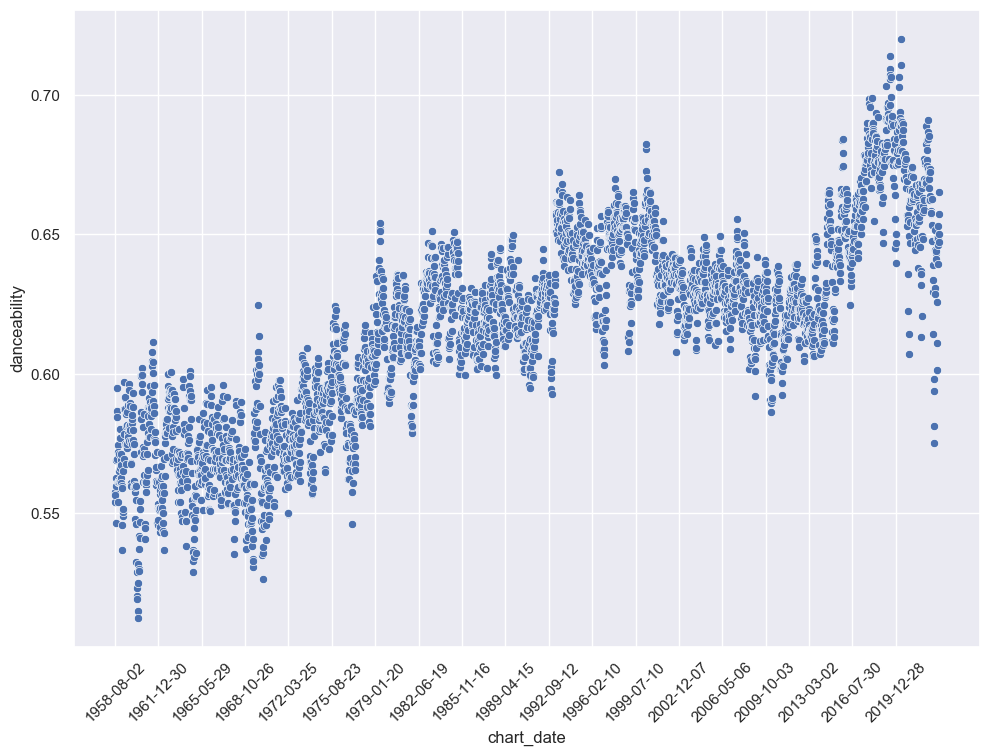

In [635]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df_mean, x='chart_date', y='danceability')
plt.gca().set_xticks(x_ticks)
plt.xticks(rotation = 45)
plt.show()

In [636]:
df_mean.columns

Index(['chart_date', 'danceability', 'duration_ms', 'energy', 'loudness',
       'tempo', 'valence'],
      dtype='object')

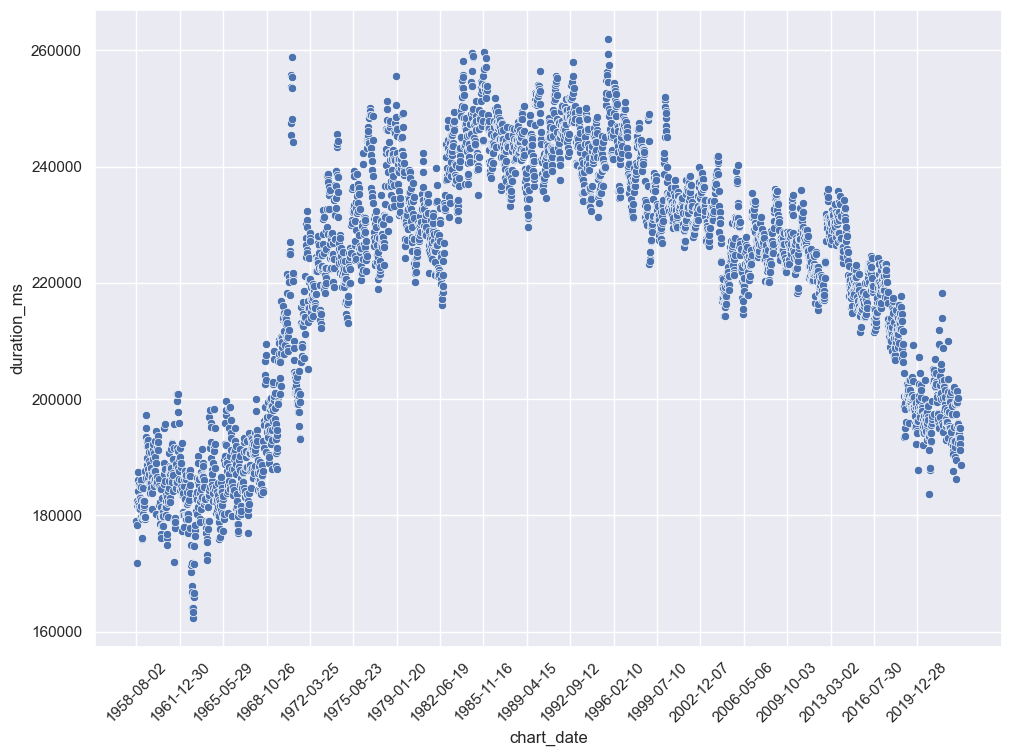

In [637]:
sns.scatterplot(data=df_mean, x='chart_date', y='duration_ms')
plt.gca().set_xticks(x_ticks)
plt.xticks(rotation = 45)
plt.show()

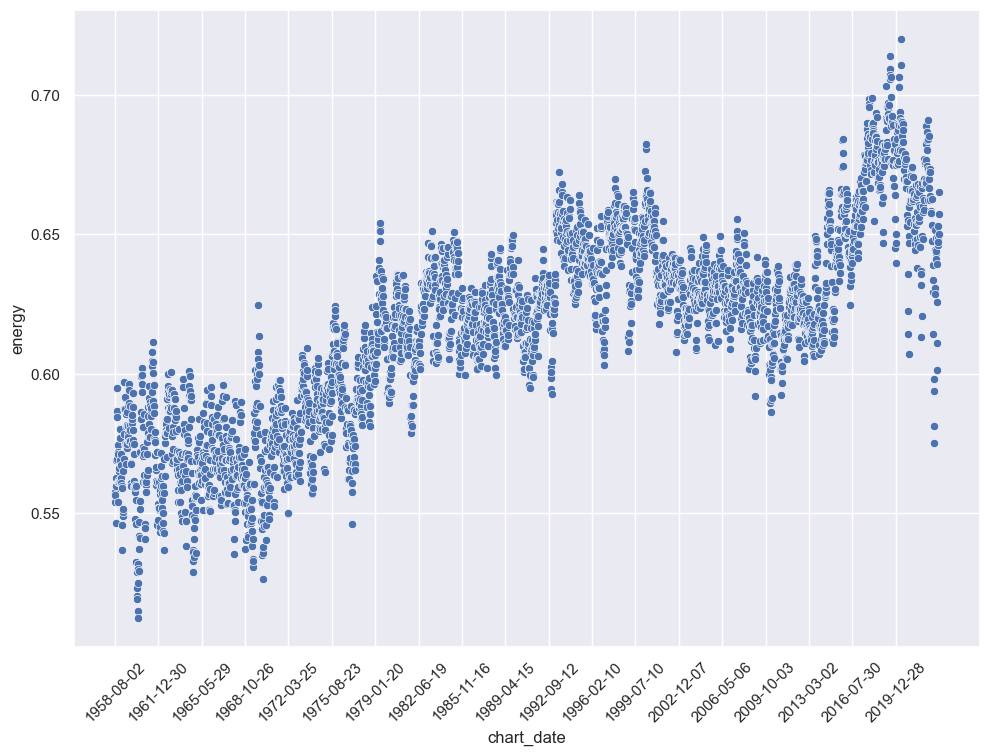

In [638]:
sns.scatterplot(data=df_mean, x='chart_date', y='energy')
plt.gca().set_xticks(x_ticks)
plt.xticks(rotation = 45)
plt.show()

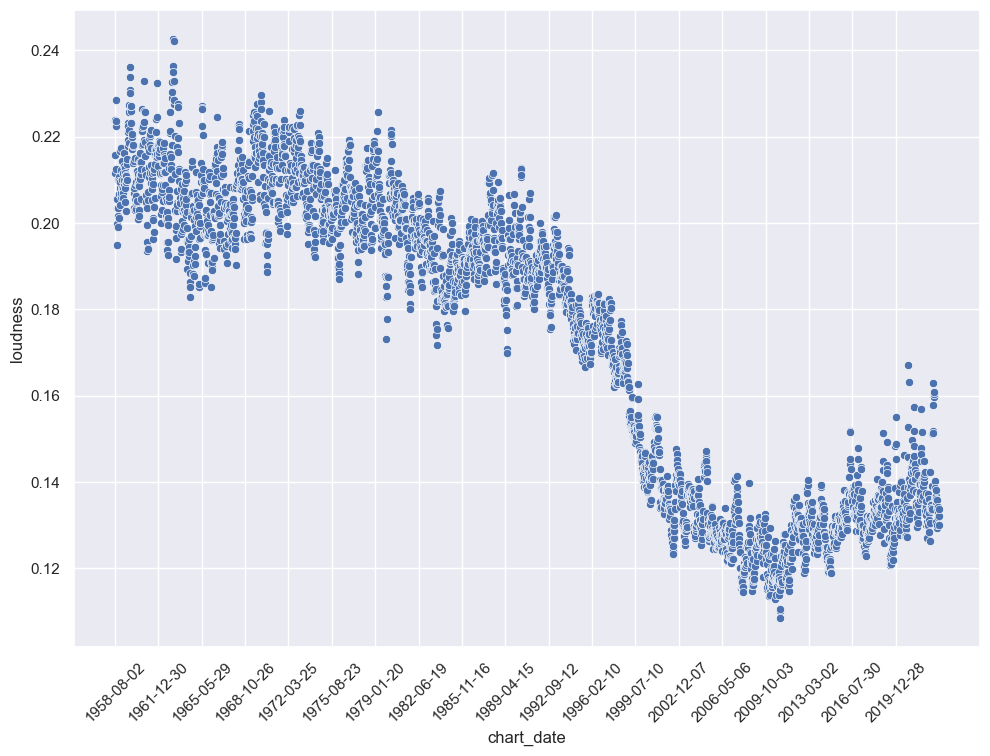

In [639]:
sns.scatterplot(data=df_mean, x='chart_date', y='loudness')
plt.gca().set_xticks(x_ticks)
plt.xticks(rotation = 45)
plt.show()

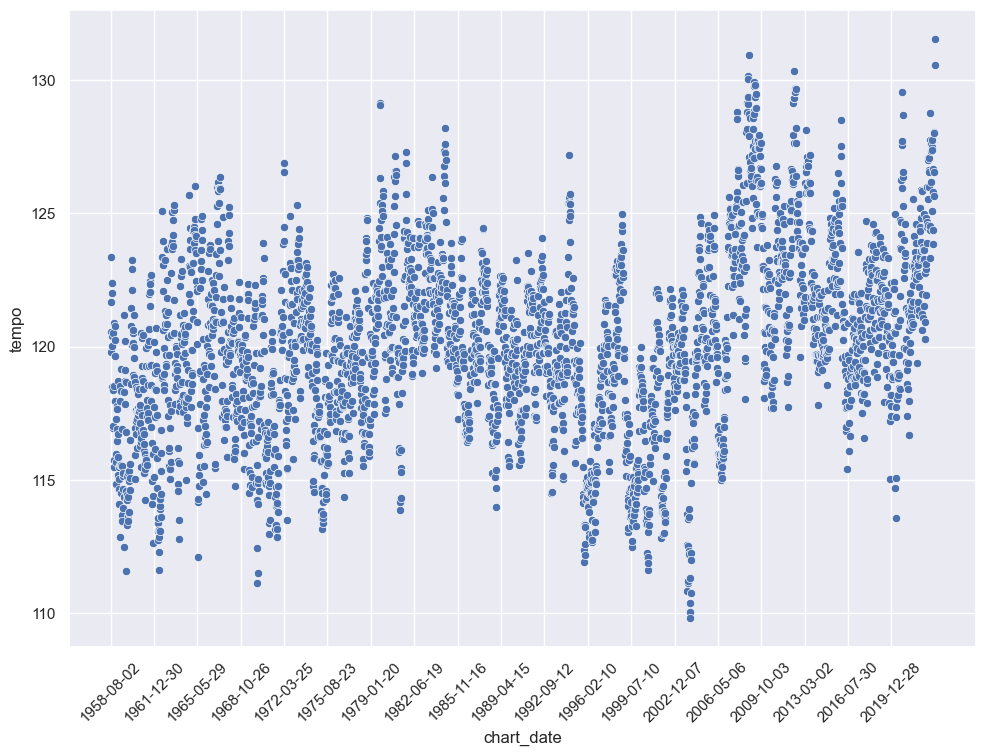

In [640]:
sns.scatterplot(data=df_mean, x='chart_date', y='tempo')
plt.gca().set_xticks(x_ticks)
plt.xticks(rotation = 45)
plt.show()

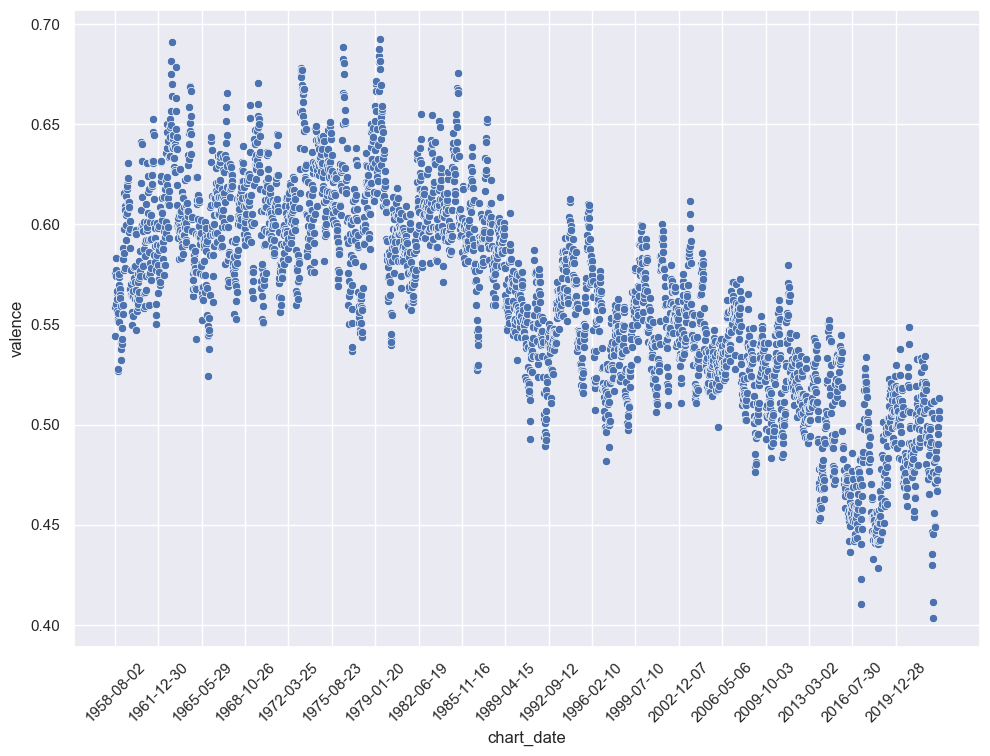

In [641]:
sns.scatterplot(data=df_mean, x='chart_date', y='valence')
plt.gca().set_xticks(x_ticks)
plt.xticks(rotation = 45)
plt.show()

Generating line of best fit Polynomially

In [744]:
def poly_line_generator(attribute, color='red', legend=True, dot_alpha=0.25, label='best fit'):

    # Preparing X and y from the given data
    df_mean[attribute] = pd.to_numeric(df_mean[attribute])
    y = df_mean[attribute].values

    degree = 15
    X = np.arange(len(df_mean))

    coefficients = np.polyfit(X, y, degree)

    # Generate y values for the polynomial curve
    y_fit = np.poly1d(coefficients)(X)
    # Create the scatter plot
    plt.scatter(df_mean['chart_date'], df_mean[attribute], label='Data', s=10, alpha=dot_alpha)  # Adjust 's' for marker size
    # Plot the best-fit curve
    best_fit = plt.plot(df_mean['chart_date'], y_fit, label=label, color=color, linewidth=2.5)

    # Customize the plot
    plt.xlabel('Date')
    plt.ylabel(attribute)
    plt.title('Scatter Plot with Polynomial Fit')
    if legend:
        plt.legend()
    plt.gca().set_xticks(x_ticks)
    plt.xticks(rotation = 45)
    # Rotate x-axis labels for better readability (optional)
    plt.xticks(rotation=45)

    return best_fit

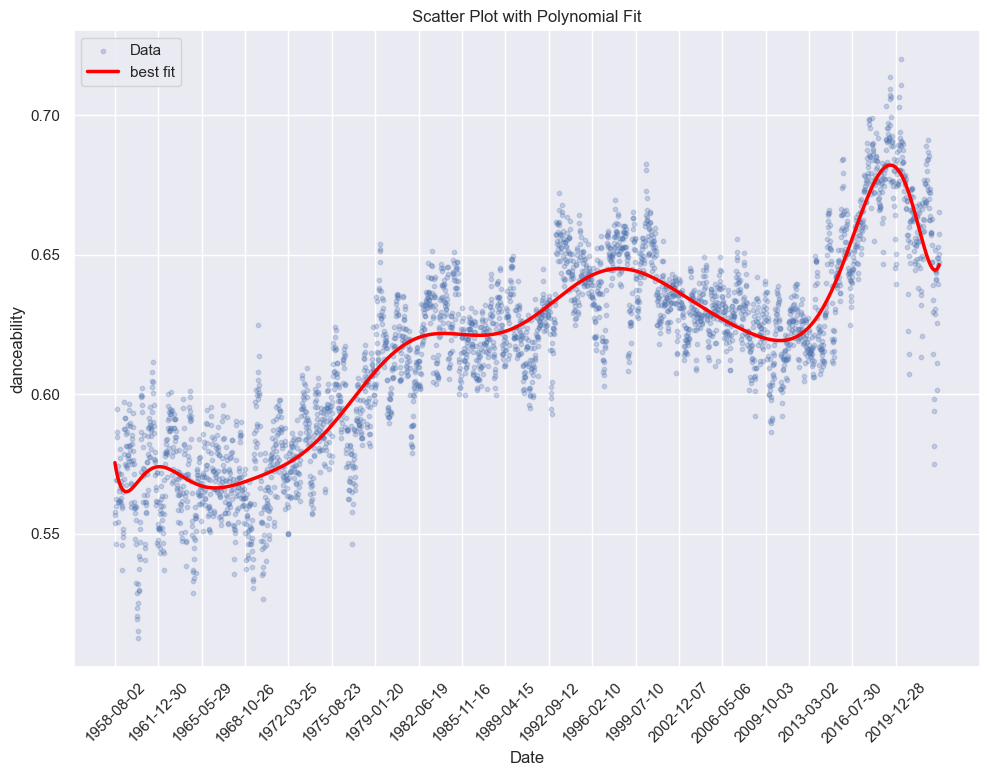

In [745]:
poly_line_generator('danceability')
plt.show()

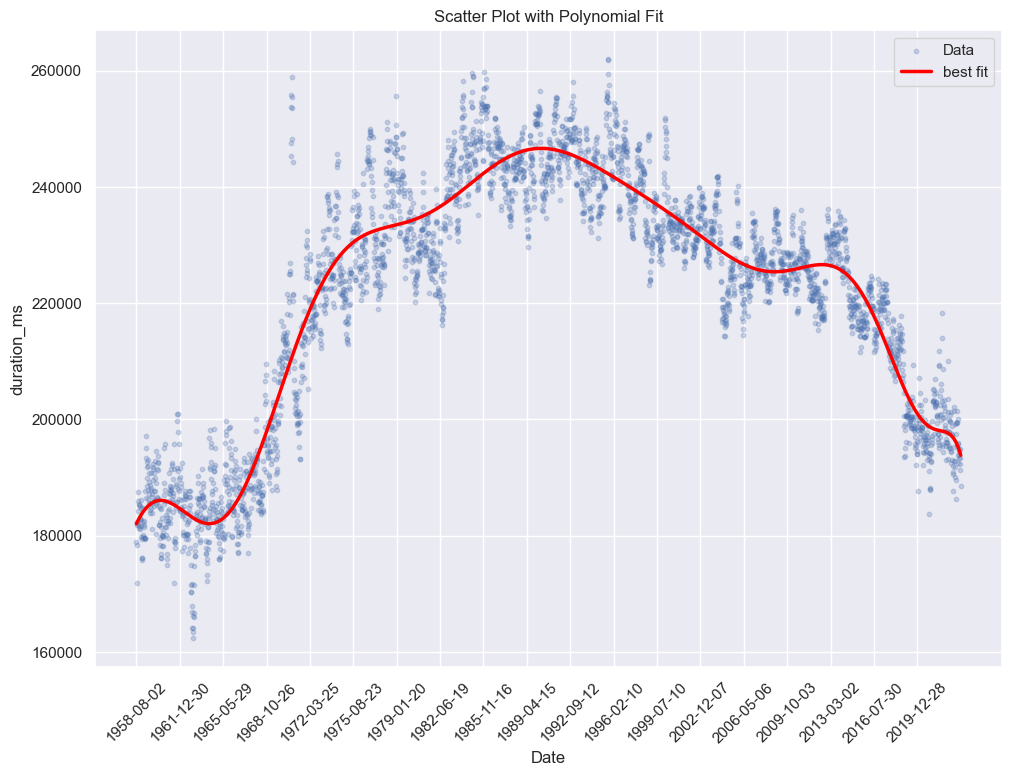

In [746]:
poly_line_generator('duration_ms')
plt.show()

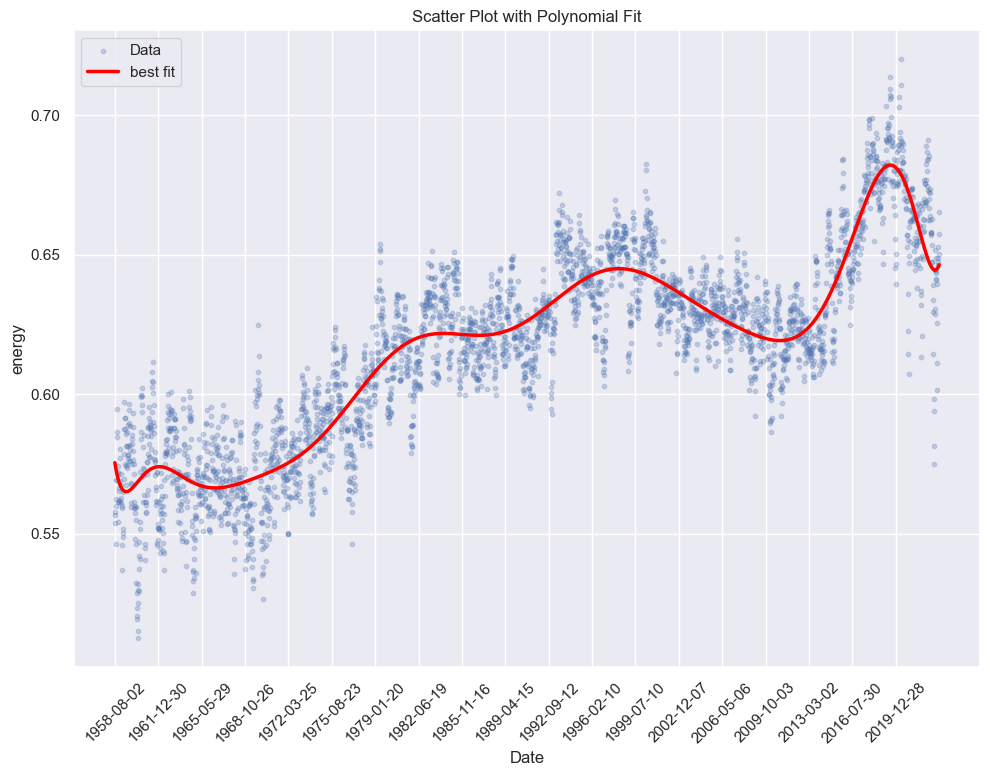

In [747]:
poly_line_generator('energy')
plt.show()

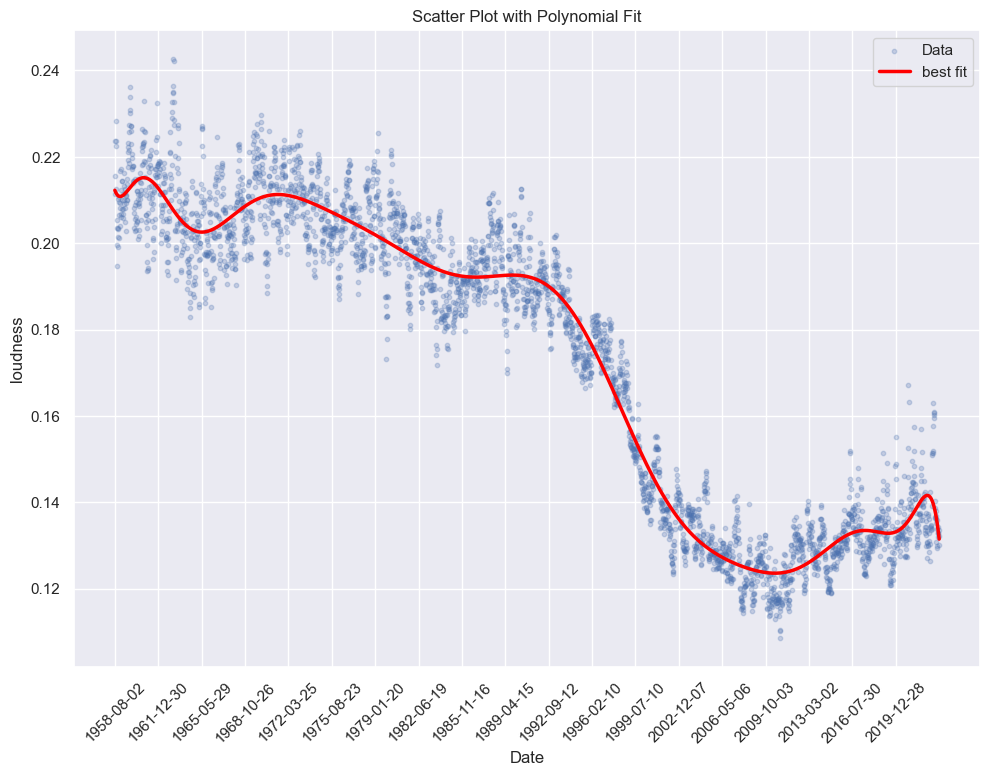

In [748]:
poly_line_generator('loudness')
plt.show()

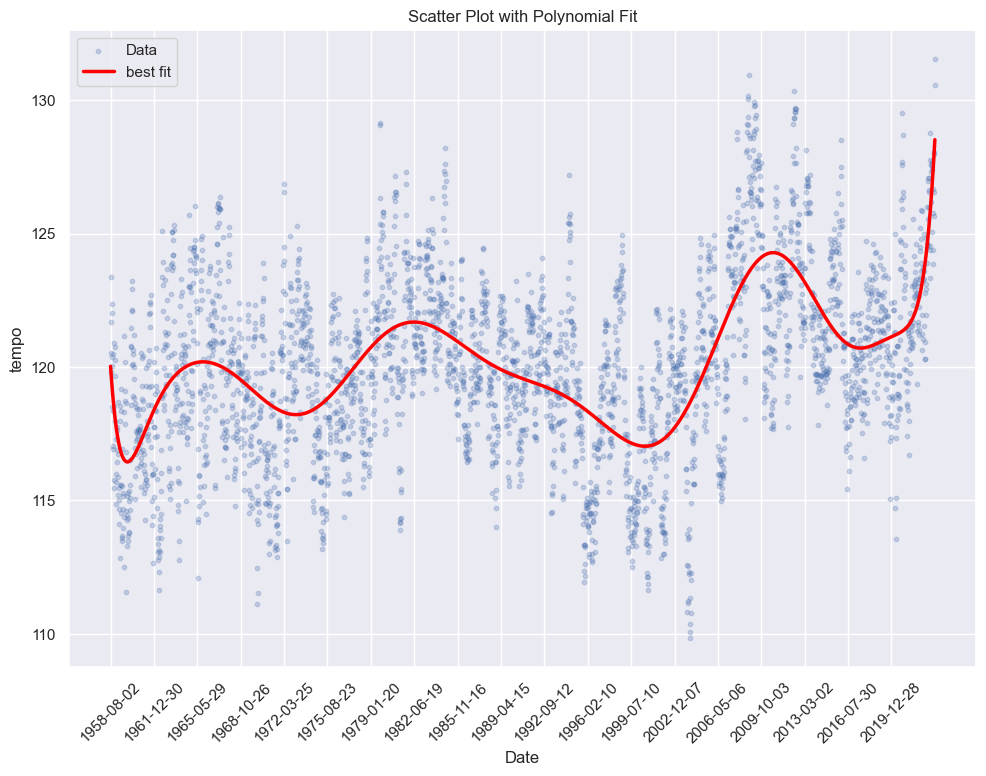

In [749]:
poly_line_generator('tempo')
plt.show()

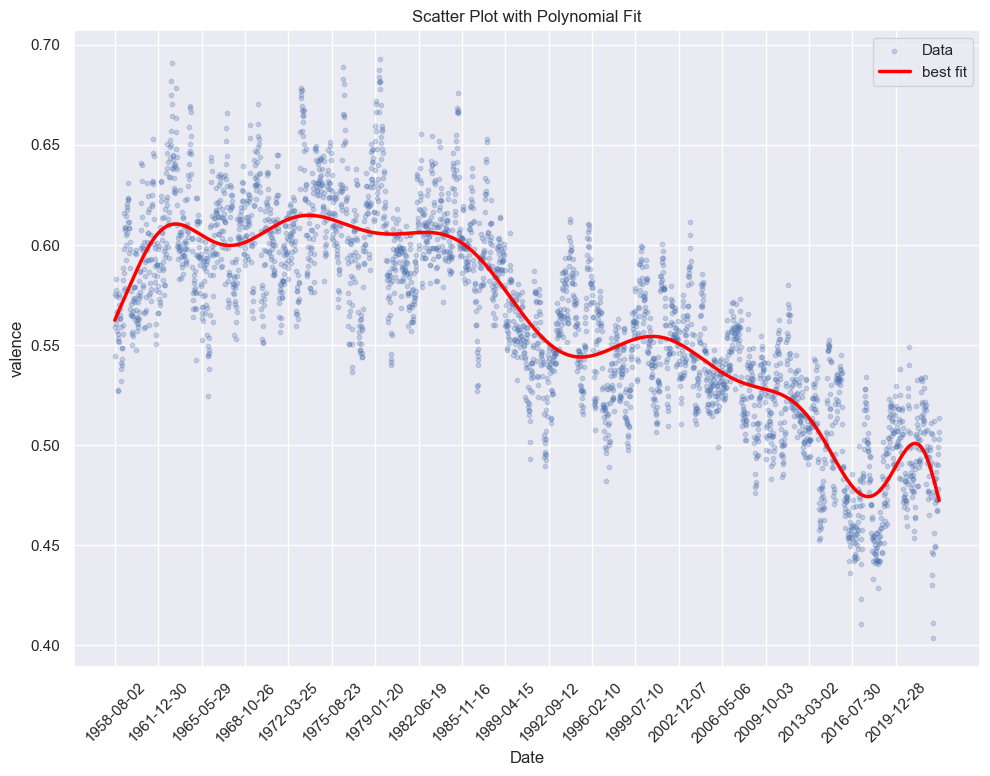

In [750]:
poly_line_generator('valence')
plt.show()

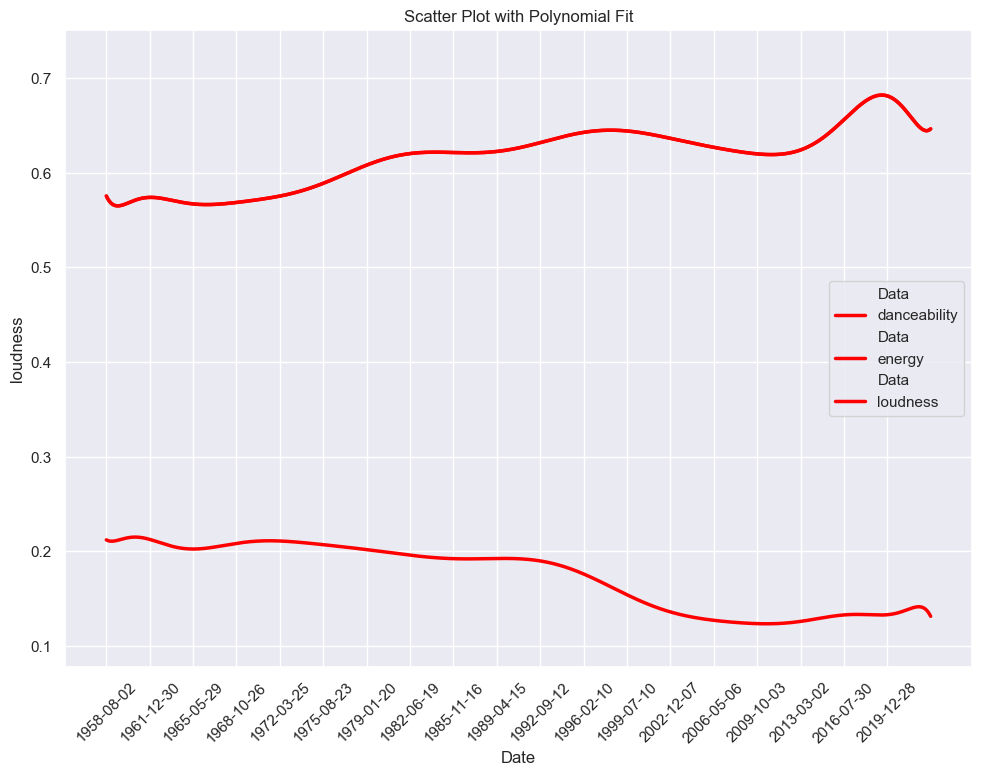

In [751]:
poly_line_generator('danceability', dot_alpha=0, legend=False, label='danceability')
poly_line_generator('energy', dot_alpha=0, legend=False, label='energy')
poly_line_generator('loudness', dot_alpha=0, legend=False, label='loudness')
plt.legend()
